**Title- Clustering for Customer Segmentation & Understanding.**

**Domain-** Marketing

**Problem Statement:**
Not all customers are same. To know which group is your customer and their
preferences is a big part for success in your business. Unsupervised machine learning
can help marketers to know their audience globally and engage them with their products
accordingly.

Here we can classify millions of people’s interests through their social media activity
and also through other surveys online & offline and cluster them in specific group of
their interest.

**Project Workflow-**
1) Create business case

2) Prepare the data

3) Data analysis & exploration

4) Clustering analysis

5) Choosing optimal hyperparameters

6) Visualization & interpretation

## Advantages of customer segmentation-
1) Price optimization

2) Enhances competitiveness

3) Brand awareness

4) Acquisition & retention

5) Increases revenue & ROI

In [52]:
# Importing data manipulation liabraries
import numpy as np
import pandas as pd

# Importing data viasualization liabraries 
import matplotlib.pyplot as plt
import seaborn as sns

# Model building liabraries
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Loading the dataset
data = pd.read_csv('C:/Users/user/Desktop/Projects/ineuron/Customer_segmentation/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Columns**

**1) CustomerID:** Unique id for each cistomer

**2) Gender:** Male & Female

**3) Age:** Age of the customer.

**4) Annual Income:** Annual income of customer(unit=(k$))

**5) Spending Score (1-100)-** It is a numerical value assigned to customers based on their purchasing behavior. The score typically ranges from 1 to 100, where a higher score indicates a higher likelihood of the customer spending more.

The Spending Score is often derived from various factors such as:

- Frequency of purchases: How often does the customer make a purchase?

- Monetary value of purchases: How much money does the customer spend per transaction?

- Types of products purchased: Are the purchases high-margin items or lower-margin items?

- Recency of purchases: How recently did the customer make a purchase?

A customer with a high Spending Score is likely to be more valuable to a business as they contribute more to revenue. On the other hand, a lower Spending Score might indicate a customer who makes infrequent or smaller purchases.

In [54]:
# Creating dataframe
df = pd.DataFrame(data)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
# Shape 
df.shape

(200, 5)

In [56]:
# Checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [57]:
# Checking for duplicate values
df.duplicated().sum()

0

In [58]:
# Checking for unique values for gender column 
print(df['Gender'].unique().sum())

MaleFemale


In [59]:
# Data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [60]:
# Data describe
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Analysis
## Categorical variable
**1) Gender**

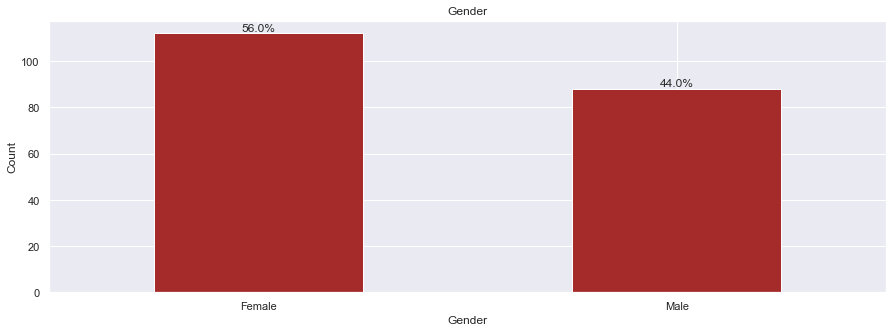

In [61]:
# Density curve for gender column
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
ax = df['Gender'].value_counts().plot(kind='bar',color='brown')

# Adding count labels
for i, value in enumerate(df['Gender'].value_counts()):
    percentage = (value/len(df))*100
    plt.text(i, value + 0.1, f'{percentage:.1f}%' , ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender')
plt.xticks(rotation=360)
plt.show()

- Here, out of total costomers maximum customers are from female.
- Female = 56%
- Male = 44%

#### Numeric variables
**1) Age**

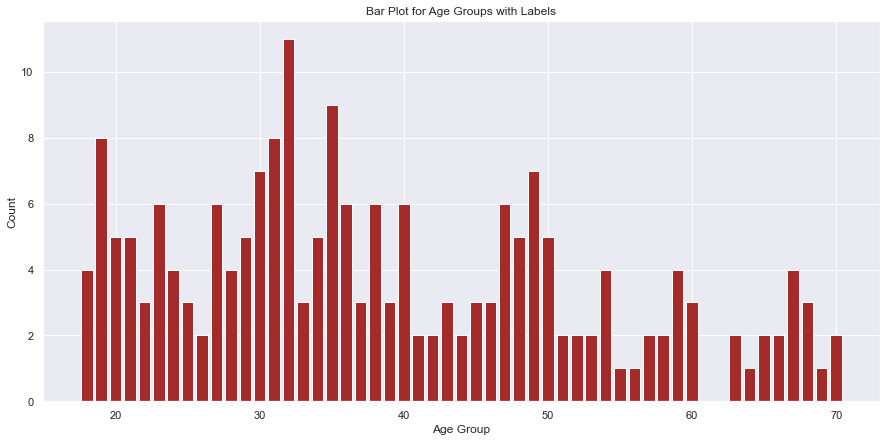

In [62]:
# Define age groups
plt.figure(figsize=(15,7))
bins = [20, 30, 40, 50, 60, 70]  
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a bar plot for age groups
counts = df['Age'].value_counts().sort_index()
plt.bar(counts.index, counts.values, color='brown')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Bar Plot for Age Groups with Labels')
plt.show()

- Maximum customers are from age group of (30-39)

In [63]:
# Define age groups
age_bins = [15, 25, 35, 45, 55, 65,75]
age_labels = ['15-25','26-35','36-45','46-55','56-65','66+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

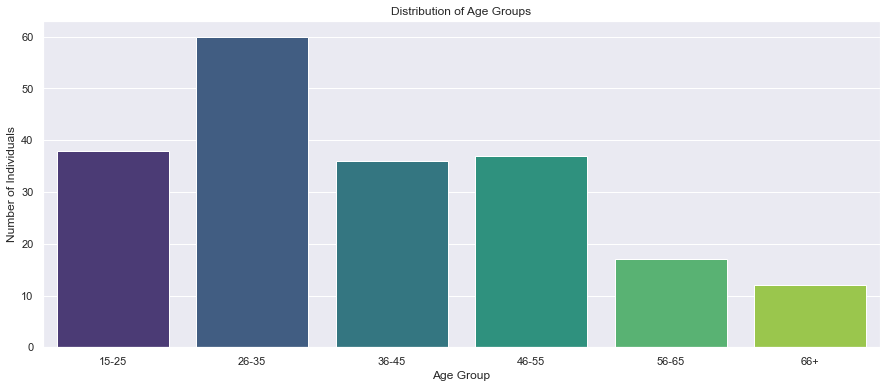

In [64]:
# Bar plot for age groups
# Create a bar plot
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.countplot(x='Age_Group', data=df, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Age Groups')
plt.show()

**2) Annual Income(k$)**

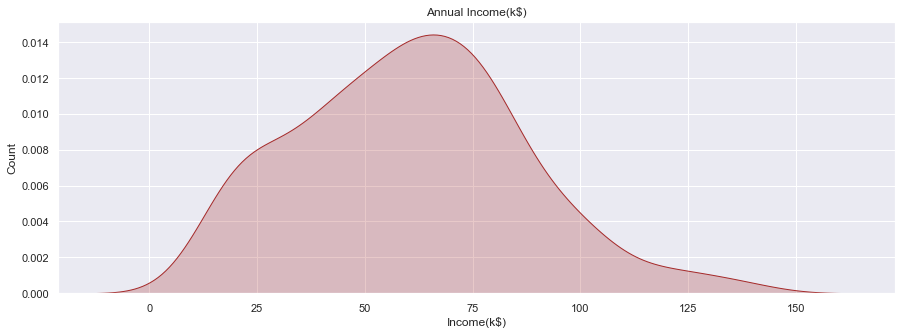

In [65]:
# Density curve for annual income
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
sns.kdeplot(df['Annual Income (k$)'], fill=True, color='brown')

plt.title('Annual Income(k$)')
plt.xlabel('Income(k$)')
plt.ylabel('Count')
plt.show()

In [66]:
income_bins = [10, 40, 65, 90,115, 140,141]
income_labels = ['10-40(k$)', '41-65(k$)', '66-90(k$)', '91-115(k$)','116-140(k$)','141(k$)+']
df['Income_Group'] = pd.cut(df['Annual Income (k$)'], bins=income_bins, labels=income_labels)

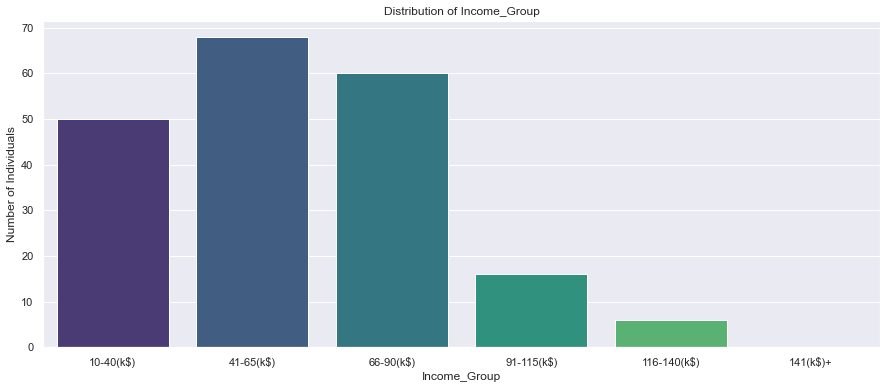

In [67]:
# Bar plot for income groups
# Create a bar plot
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.countplot(x='Income_Group', data=df, palette='viridis')
plt.xlabel('Income_Group')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Income_Group')
plt.show()

**3) Spending Score (1-100)**

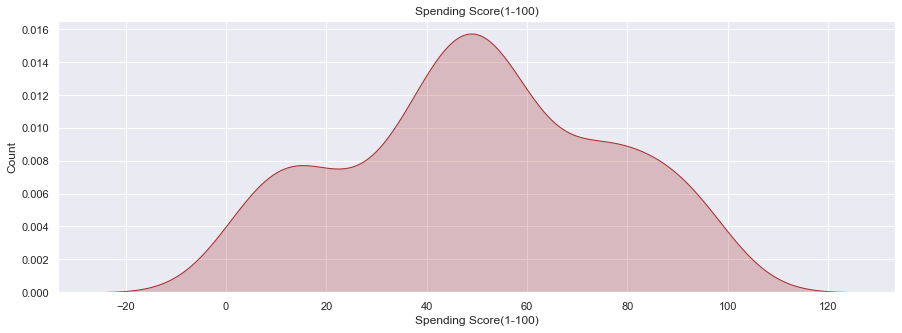

In [68]:
# Density curve for spending score
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
sns.kdeplot(df['Spending Score (1-100)'],fill=True,color='brown')
plt.title('Spending Score(1-100)')
plt.xlabel('Spending Score(1-100)')
plt.ylabel('Count')
plt.show()

In [69]:
# Define spending score groups
spending_bins = [0, 20, 40, 60, 80,100]
spending_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['Spending_Score_Group'] = pd.cut(df['Spending Score (1-100)'], bins=spending_bins, labels=spending_labels)

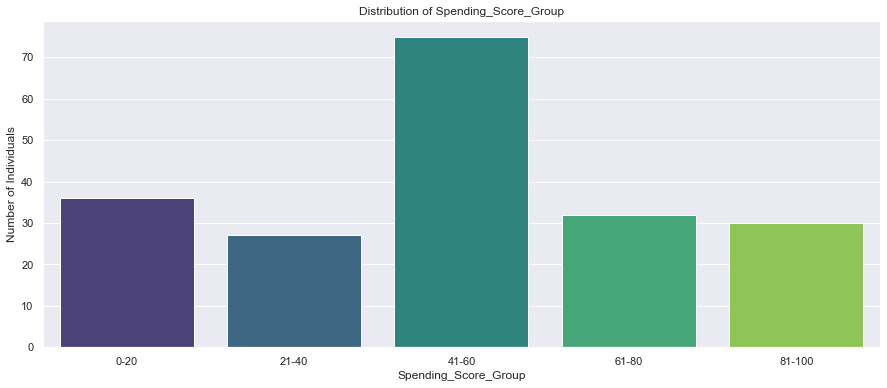

In [70]:
# Bar plot for spending score groups
# Create a bar plot
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.countplot(x='Spending_Score_Group', data=df, palette='viridis')
plt.xlabel('Spending_Score_Group')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Spending_Score_Group')
plt.show()

#### Relation etween categorical & numeric variables 

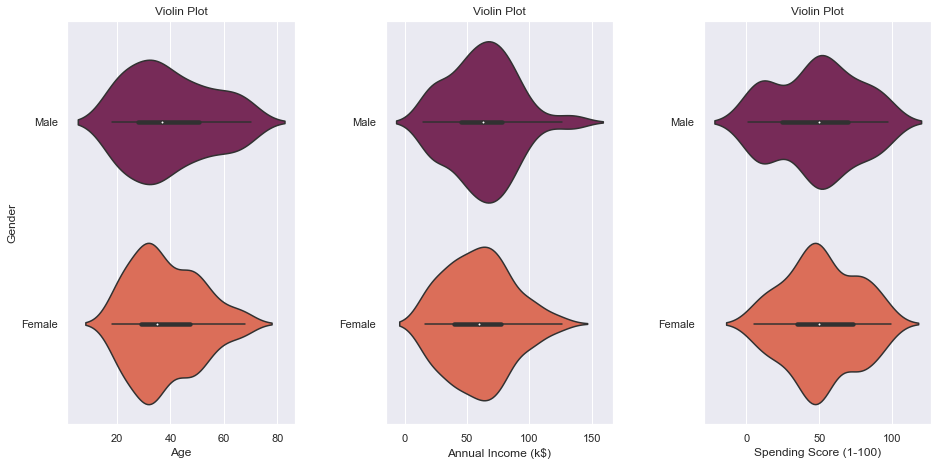

In [71]:
# Gender column v/s Income, Age, Spending Score
plt.figure(figsize=(15,7))
n= 0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n = n+1
    plt.subplot(1,3,n)
    sns.set(style='darkgrid')
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
    sns.violinplot(x = cols, y = 'Gender', data = df,palette='rocket')
    plt.ylabel('Gender' if n == i else " ")
    plt.title('Violin Plot')
plt.show()

#### Relation etween numeric variables
1) Age & Annual Income

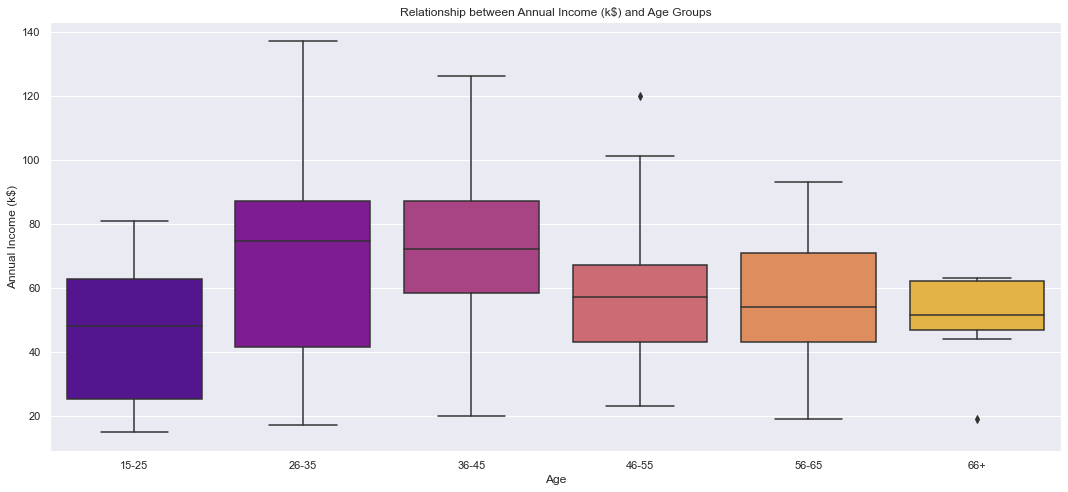

In [72]:
# Relation between age & annual income
plt.figure(figsize=(15,7))
sns.boxplot(x='Age_Group', y='Annual Income (k$)', data=df, palette='plasma')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Relationship between Annual Income (k$) and Age Groups')
plt.tight_layout()
plt.show()

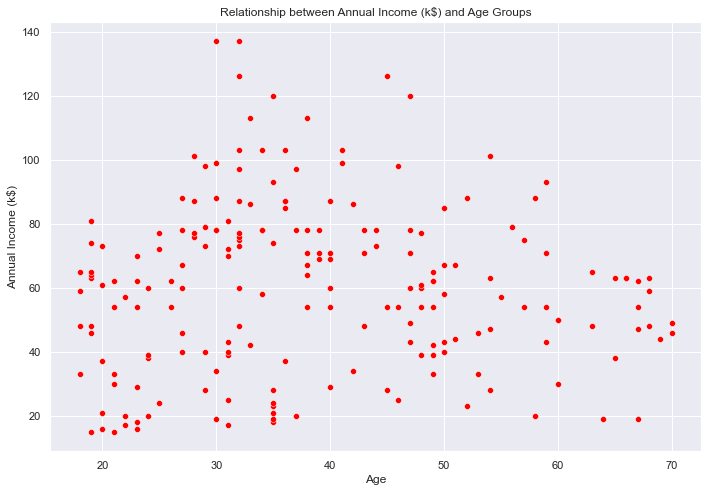

In [73]:
# Relation between age & annual income
plt.figure(figsize=(10,7))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, color='red')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Relationship between Annual Income (k$) and Age Groups')
plt.tight_layout()
plt.show()

- Age group of (25-45) has high annual income. 
- As age increasing spread for income is decreasing.
- Age group of (15-25) has low annual income.

2) Age & Spending Score

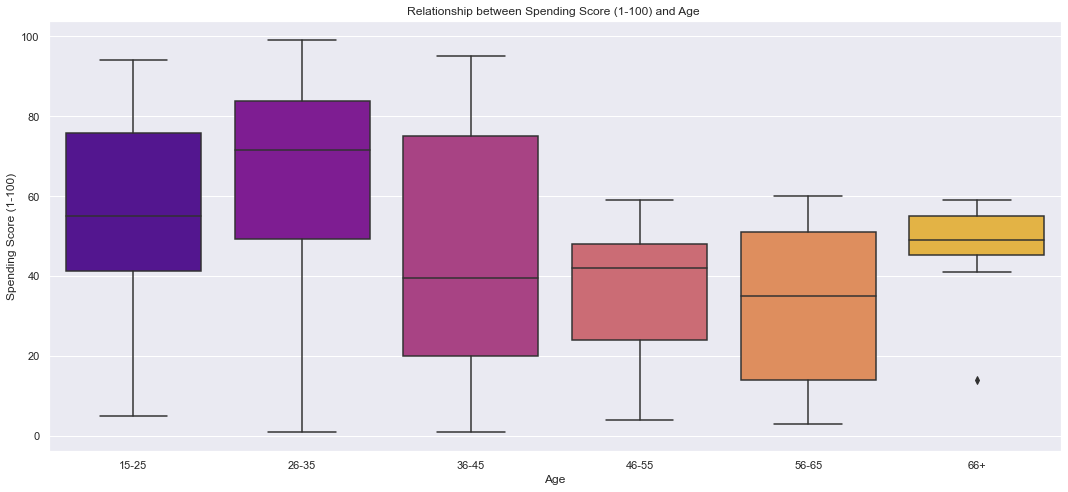

In [74]:
# Relation between age & annual income
plt.figure(figsize=(15,7))
sns.boxplot(x='Age_Group', y='Spending Score (1-100)', data=df, palette='plasma')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Relationship between Spending Score (1-100) and Age ')
plt.tight_layout()
plt.show()

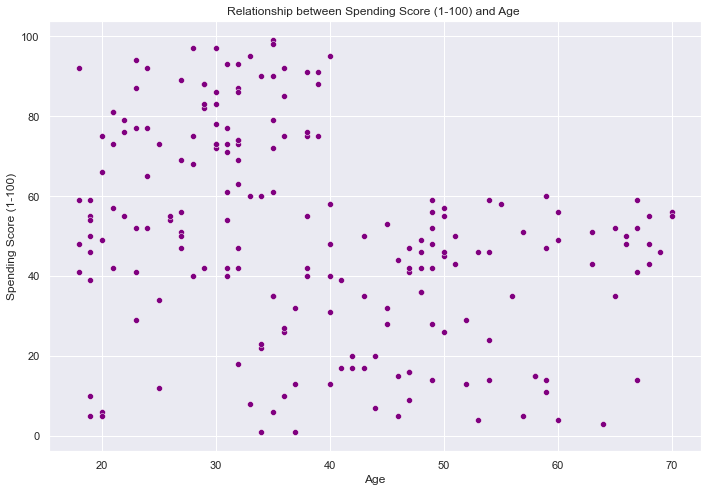

In [75]:
# Relation between age & annual income
plt.figure(figsize=(10,7))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, color='purple')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Relationship between Spending Score (1-100) and Age ')
plt.tight_layout()
plt.show()

- Age group of (15-45) has high spending score. As age increases spending score is decreasing.

3) Annual income & Spending score

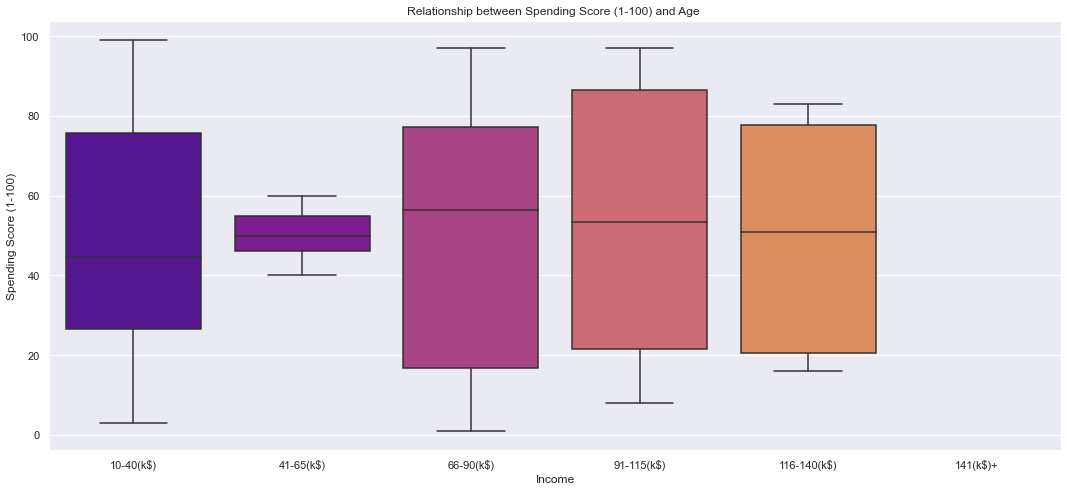

In [76]:
# Relation between spending score & annual income
plt.figure(figsize=(15,7))
sns.boxplot(x='Income_Group', y='Spending Score (1-100)', data=df, palette='plasma')
plt.xlabel('Income')
plt.ylabel('Spending Score (1-100)')
plt.title('Relationship between Spending Score (1-100) and Age ')
plt.tight_layout()
plt.show()

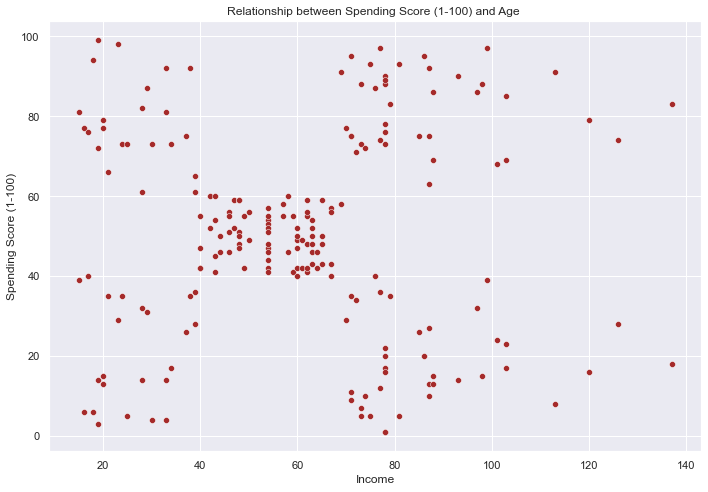

In [77]:
# Relation between spending score & annual income
plt.figure(figsize=(10,7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, color='brown')
plt.xlabel('Income')
plt.ylabel('Spending Score (1-100)')
plt.title('Relationship between Spending Score (1-100) and Age ')
plt.tight_layout()
plt.show()

- Customers having income range (40-65) have spending score between 40 and 60. 

### Types of segmentation factors
**1) Demographic-** 
- Age
- Gender
- Income
- Location
- Education
- Ethnicity
                
**2) Psychographic-**
- Interest
- Lifestyles
- Psychological influences
- Motivations
- Priorities

**3)Behavioural-**
- Purchasing habits
- Spending habits
- User status
- Brand interaction

**4) Geographic-**
- ZIP code
- City
- Country
- Climate
- Urban or Rural
                 

In [78]:
# Standardize the data
df_scaled = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_scaled)

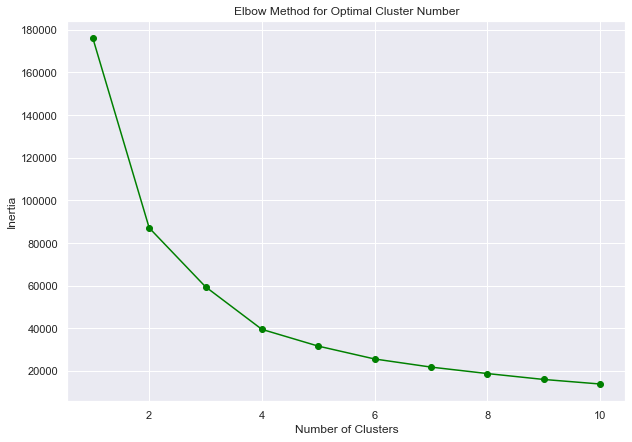

In [79]:
# KMeans for age & annual income
# Use the elbow method to find the optimal number of clusters
x = df_scaled[['Age','Annual Income (k$)']]
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10,7))
plt.plot(range(1, 11), inertia, marker='o',color='green')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

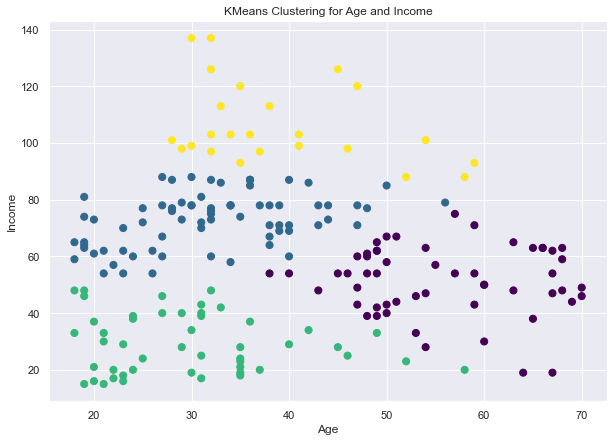

In [90]:
# KMeans
# Instantiate KMeans model
kmeans = KMeans(n_clusters=4) 
kmeans.fit(x)
predicted_labels = kmeans.predict(x)

# Plot the data with KMeans predicted labels
plt.figure(figsize=(10,7))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=predicted_labels, s=50, cmap='viridis')
plt.title("KMeans Clustering for Age and Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

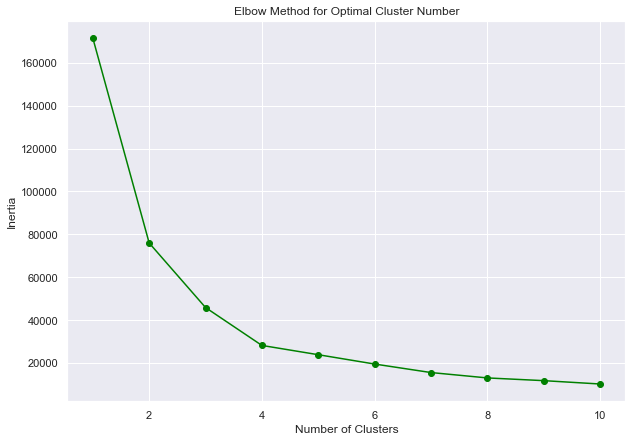

In [81]:
# KMeans for age & 'Spending Score (1-100)'
# Use the elbow method to find the optimal number of clusters
y = df_scaled[['Age','Spending Score (1-100)']]
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(y)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10,7))
plt.plot(range(1, 11), inertia, marker='o',color='green')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

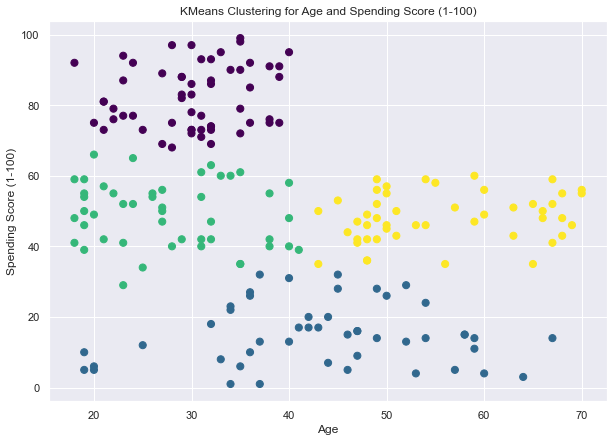

In [89]:
# KMeans
# Instantiate KMeans model
kmeans = KMeans(n_clusters=4) 
kmeans.fit(y)
predicted_labels = kmeans.predict(y)

# Plot the data with KMeans predicted labels
plt.figure(figsize=(10,7))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=predicted_labels, s=50, cmap='viridis')
plt.title("KMeans Clustering for Age and Spending Score (1-100)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

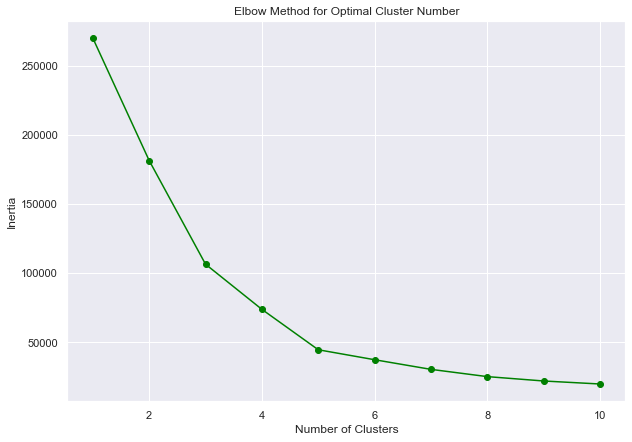

In [83]:
# KMeans for age & 'Spending Score (1-100)'
# Use the elbow method to find the optimal number of clusters
z = df_scaled[['Annual Income (k$)','Spending Score (1-100)']]
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(z)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10,7))
plt.plot(range(1, 11), inertia, marker='o',color='green')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

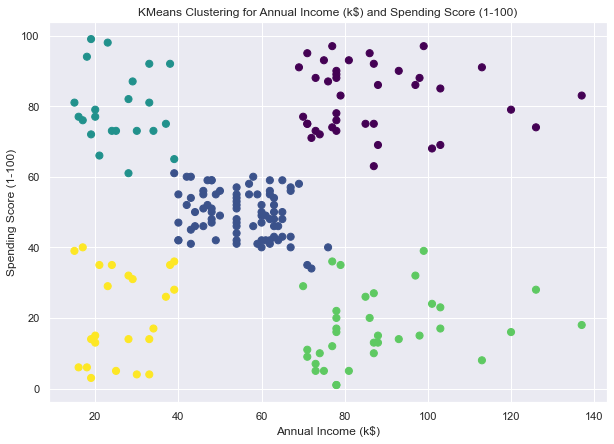

In [88]:
# KMeans
# Instantiate KMeans model
kmeans = KMeans(n_clusters=5) 
kmeans.fit(z)
predicted_labels = kmeans.predict(z)

# Plot the data with KMeans predicted labels
plt.figure(figsize=(10,7))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=predicted_labels, s=50, cmap='viridis')
plt.title("KMeans Clustering for Annual Income (k$) and Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

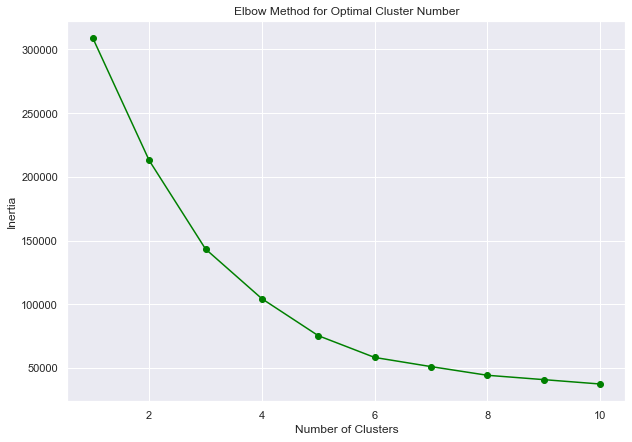

In [85]:
# KMeans for age & 'Spending Score (1-100)' & Annual Income (k$)
# Use the elbow method to find the optimal number of clusters
a = df_scaled[['Age','Annual Income (k$)','Spending Score (1-100)']]
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(a)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10,7))
plt.plot(range(1, 11), inertia, marker='o',color='green')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

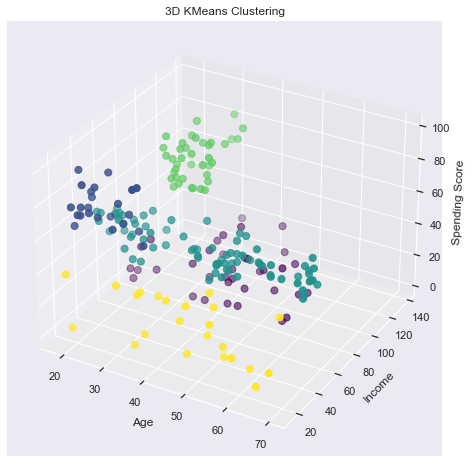

In [87]:
# KMeans
# Instantiate KMeans model
kmeans = KMeans(n_clusters=5) 
kmeans.fit(a)
predicted_labels = kmeans.predict(a)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data with KMeans predicted labels in 3D
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=predicted_labels, s=50, cmap='viridis')
ax.set_xlabel("Age")
ax.set_ylabel("Income")
ax.set_zlabel("Spending Score")
ax.set_title("3D KMeans Clustering")
plt.show()